<a href="https://colab.research.google.com/github/NWemphy/MachineLearningB_/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [77]:
#importing the dataset into kaggle
X = pd.read_csv("/content/Pengunjung_mall.csv",sep=",")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
X = X.drop('Kelamin', axis = 1)
X = X.drop('IDPelanggan', axis = 1)

In [79]:
X

,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [95]:
# Compute DBSCAN
db = DBSCAN(eps=4, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [96]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [97]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 177
Silhouette Coefficient: -0.403


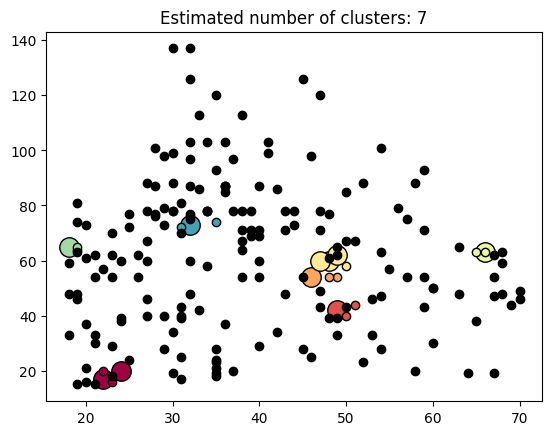

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

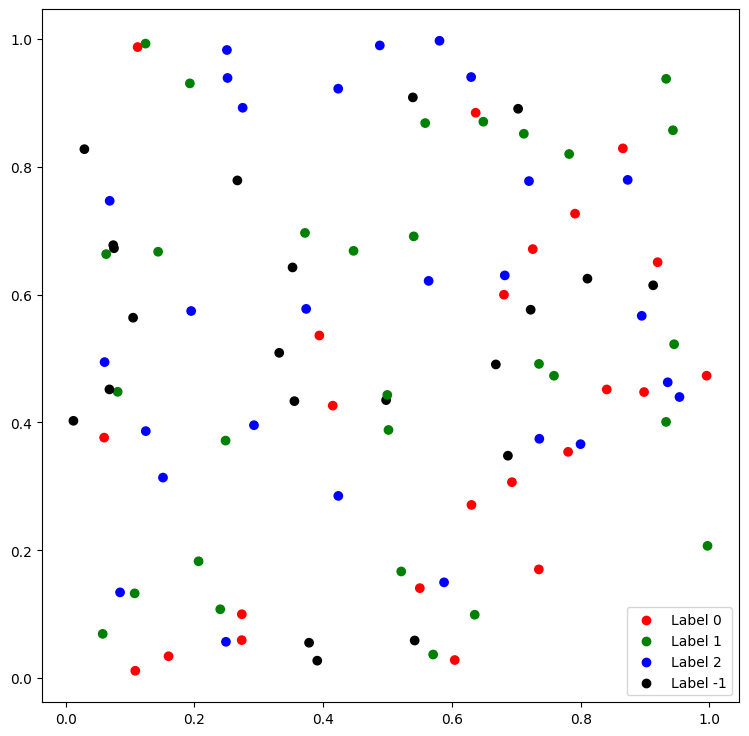

In [99]:
import matplotlib.pyplot as plt

X = pd.DataFrame({
    'Usia': np.random.rand(100),
    'Pendapatan (juta Rp)': np.random.rand(100)
})
labels = np.random.choice([0, 1, 2, -1], size=100)  # Contoh label

# Warna untuk setiap label
colours = {0: 'r', 1: 'g', 2: 'b', -1: 'k'}

# Membuat vektor warna berdasarkan label
cvec = [colours[label] for label in labels]

# Membuat figure untuk plot utama
plt.figure(figsize=(9, 9))
plt.scatter(X['Usia'], X['Pendapatan (juta Rp)'], c=cvec)

# Membuat legenda dengan contoh titik
legend_elements = [
    plt.scatter([], [], color='r', label='Label 0'),
    plt.scatter([], [], color='g', label='Label 1'),
    plt.scatter([], [], color='b', label='Label 2'),
    plt.scatter([], [], color='k', label='Label -1')
]

# Menambahkan legenda ke plot
plt.legend(handles=legend_elements)

# Menampilkan plot
plt.show()